# Prisoners Data Visualization

### Step 1: Import the necessary libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
%matplotlib inline

### Step 2: Load the data and display first 5 and last 5 records

In [4]:
data = pd.read_csv('Prisoners-Dataset.csv')

### Step 3: Describe the data

In [5]:
data.shape

(35, 6)

In [6]:
data.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
0,Andhra Pradesh,2013,9480,13758,672,170
1,Arunachal Pradesh,2013,0,0,0,0
2,Assam,2013,676,750,14,30
3,Bihar,2013,1693,3013,125,1417
4,Chhatisgarh,2013,1664,1803,192,103


In [7]:
data.columns

Index(['STATE/UT', 'YEAR', 'No. of Inmates benefitted by Elementary Education',
       'No. of Inmates benefitted by Adult Education',
       'No. of Inmates benefitted by Higher Education',
       'No. of Inmates benefitted by Computer Course'],
      dtype='object')

### Step 4: Create a column 'total_benefitted' that shows sum of inmates with respect to each State/UT

In [17]:
data['total_benefitted'] = np.sum(data.iloc[:,2:],axis=1)

In [18]:
data.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted
0,Andhra Pradesh,2013,9480,13758,672,170,24080.0
1,Arunachal Pradesh,2013,0,0,0,0,0.0
2,Assam,2013,676,750,14,30,1470.0
3,Bihar,2013,1693,3013,125,1417,6248.0
4,Chhatisgarh,2013,1664,1803,192,103,3762.0


### Step 5: Create a bar char with total benefitted inmates values in descending order

Text(0, 0.5, 'States')

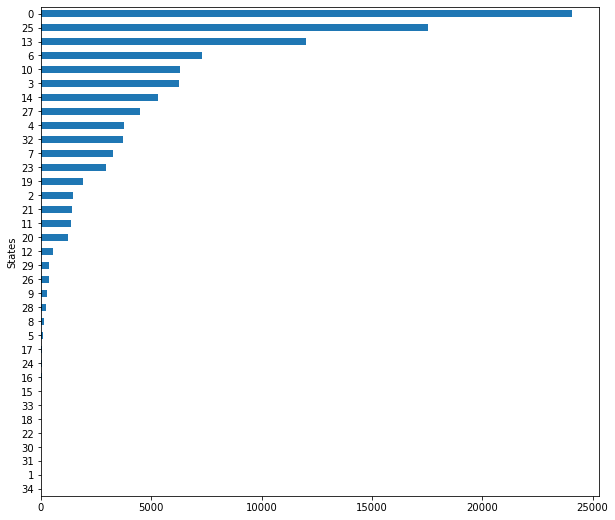

In [73]:
data['total_benefitted'].sort_values().plot(y = data['STATE/UT'],kind='barh',figsize=(10,9))
plt.ylabel('States')

### Step 6: Create a pie chart to show ratio among different modes of benefits

In [57]:
def piechart(column):
    data.iloc[:,column].plot(kind='pie',subplots=True,figsize =(20,10))

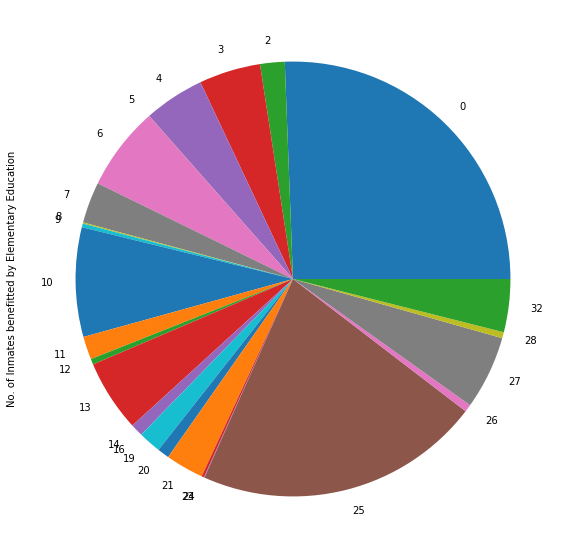

In [58]:
piechart(2)

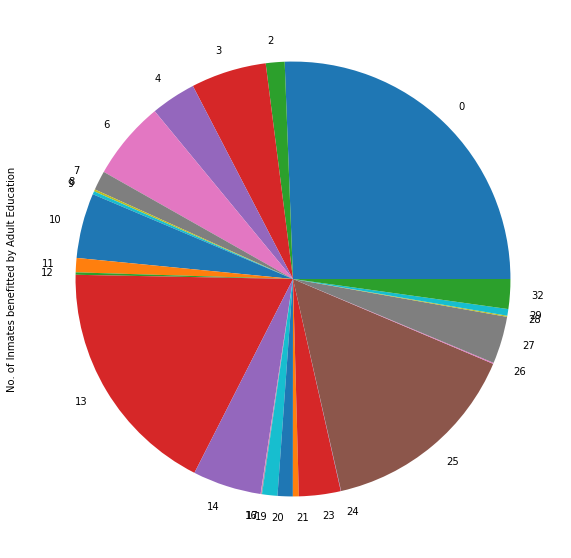

In [51]:
piechart(3)

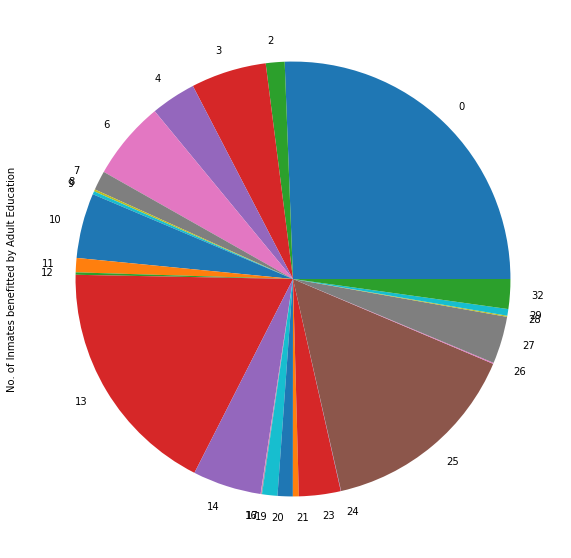

In [53]:
piechart(3)

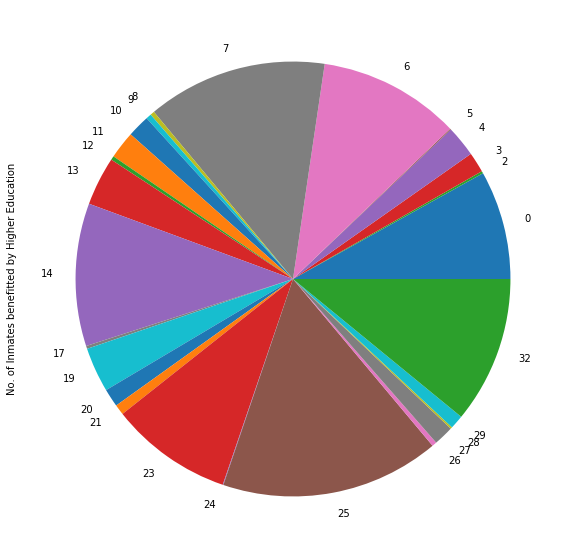

In [59]:
piechart(4)

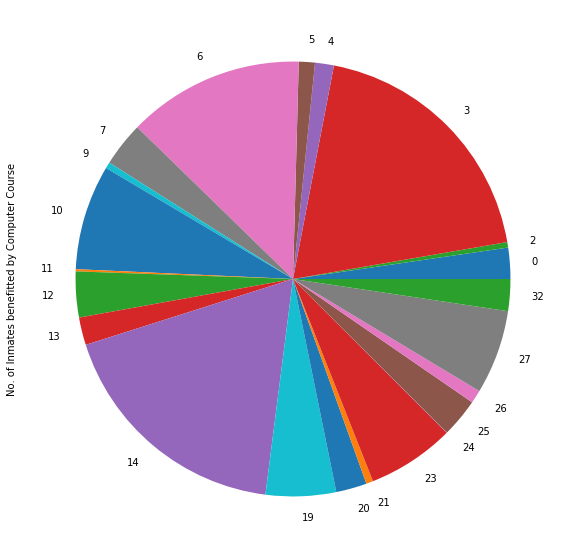

In [60]:
piechart(5)

### Now showing Ratio b/w all the modes of training

In [74]:
data.columns

Index(['STATE/UT', 'YEAR', 'No. of Inmates benefitted by Elementary Education',
       'No. of Inmates benefitted by Adult Education',
       'No. of Inmates benefitted by Higher Education',
       'No. of Inmates benefitted by Computer Course', 'total_benefitted'],
      dtype='object')

In [76]:
adults_education = data['No. of Inmates benefitted by Adult Education'].sum(axis=0)
Higher_education = data['No. of Inmates benefitted by Higher Education'].sum(axis=0)
Elementary_education = data['No. of Inmates benefitted by Elementary Education'].sum(axis=0)
Computer_education = data['No. of Inmates benefitted by Computer Course'].sum(axis=0)

In [77]:
total_education_with_modes = {'Adult_mode':adults_education,
                              'Higher_mode':Higher_education,
                               'Elementary_mode':Elementary_education,
                               'Computer_education':Computer_education}

In [78]:
new_df = pd.Series(data = total_education_with_modes)

In [79]:
new_df

Adult_mode            53720
Higher_mode            8311
Elementary_mode       37027
Computer_education     7356
dtype: int64

([<matplotlib.patches.Wedge at 0x2579be62748>,
 [Text(-0.016658933777995516, 1.0998738472776688, 'Adult_mode'),
  Text(-1.0584731906321132, -0.2993902214720357, 'Higher_mode'),
  Text(0.04765801063993421, -1.098967112347701, 'Elementary_mode'),
  Text(1.0741631195981802, -0.23700968861020405, 'Computer_education')],
 [Text(-0.009086691151633916, 0.5999311894241829, '50.48'),
  Text(-0.5773490130720617, -0.1633037571665649, '7.81'),
  Text(0.025995278530873203, -0.5994366067351095, '34.80'),
  Text(0.5859071561444619, -0.1292780119692022, '6.91')])

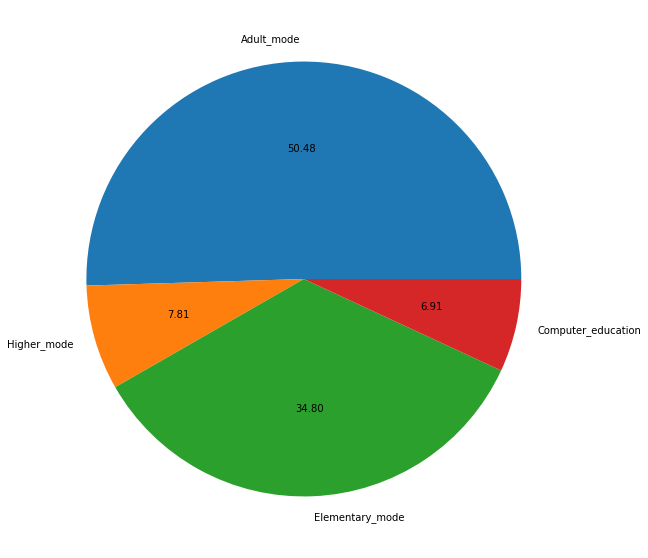

In [80]:
plt.figure(figsize=(15, 10))
plt.pie(new_df, labels=new_df.index, 
        autopct="%.2f", explode=(0, 0, 0, 0))

### Step 7: For the 5 highest benefitted states, create 
1. Bar chart. 
2. Stacked bar chart 
3. 100% stacked chart

In [97]:
data.index = data['STATE/UT']

In [98]:
highest_benefitted = data['total_benefitted'].sort_values(ascending=False)[:5]

In [99]:
highest_benefitted

STATE/UT
Andhra Pradesh    24080.0
Uttar Pradesh     17534.0
Madhya Pradesh    12004.0
Gujarat            7284.0
Jharkhand          6315.0
Name: total_benefitted, dtype: float64

In [100]:
data.drop(columns = 'STATE/UT')

,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted,adults_education,Higher_education,Elementary_education,Computer_education
STATE/UT,,,,,,,,,,
Andhra Pradesh,2013,9480,13758,672,170,24080.0,53720,8311,37027,7356
Arunachal Pradesh,2013,0,0,0,0,0.0,53720,8311,37027,7356
Assam,2013,676,750,14,30,1470.0,53720,8311,37027,7356
Bihar,2013,1693,3013,125,1417,6248.0,53720,8311,37027,7356
Chhatisgarh,2013,1664,1803,192,103,3762.0,53720,8311,37027,7356
Goa,2013,7,0,6,88,101.0,53720,8311,37027,7356
Gujarat,2013,2310,3133,875,966,7284.0,53720,8311,37027,7356
Haryana,2013,1131,774,1112,243,3260.0,53720,8311,37027,7356
Himachal Pradesh,2013,33,80,26,0,139.0,53720,8311,37027,7356


In [101]:
highest_benefitted_states = highest_benefitted.index.tolist()

In [102]:
highest_benefitted_states

['Andhra Pradesh', 'Uttar Pradesh', 'Madhya Pradesh', 'Gujarat', 'Jharkhand']

In [104]:
data = data.drop(columns = ['adults_education','Higher_education','Elementary_education','Computer_education'])

In [105]:
data.head()

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course,total_benefitted
STATE/UT,,,,,,,
Andhra Pradesh,Andhra Pradesh,2013,9480,13758,672,170,24080.0
Arunachal Pradesh,Arunachal Pradesh,2013,0,0,0,0,0.0
Assam,Assam,2013,676,750,14,30,1470.0
Bihar,Bihar,2013,1693,3013,125,1417,6248.0
Chhatisgarh,Chhatisgarh,2013,1664,1803,192,103,3762.0


In [106]:
int_columns = ['No. of Inmates benefitted by Elementary Education',
               'No. of Inmates benefitted by Adult Education',
               'No. of Inmates benefitted by Higher Education',
               'No. of Inmates benefitted by Computer Course',]

In [107]:
highest_benefitted = data[int_columns][data.index.isin(highest_benefitted_states)]

In [108]:
highest_benefitted

,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
STATE/UT,,,,
Andhra Pradesh,9480,13758,672,170
Gujarat,2310,3133,875,966
Jharkhand,3008,2595,138,574
Madhya Pradesh,1978,9574,301,151
Uttar Pradesh,7876,8093,1353,212


In [109]:
highest_benefitted.rename({
    'No. of Inmates benefitted by Elementary Education': 'Elementary Edu',
    'No. of Inmates benefitted by Adult Education': 'Adult Edu',
    'No. of Inmates benefitted by Higher Education': 'Higher Edu',
    'No. of Inmates benefitted by Computer Course': 'Computer Course'
}, axis=1, inplace=True)

## Bar Chart

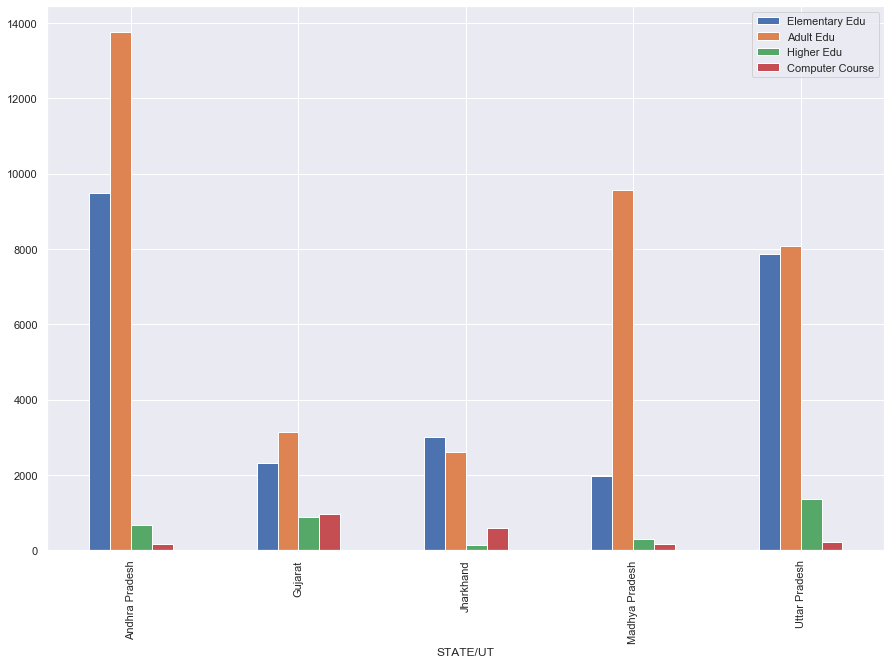

In [118]:
sns.set(rc={'figure.figsize':(15, 7)})
highest_benefitted.plot(kind='bar',figsize=(15,10))

## Bar Stacked Chart

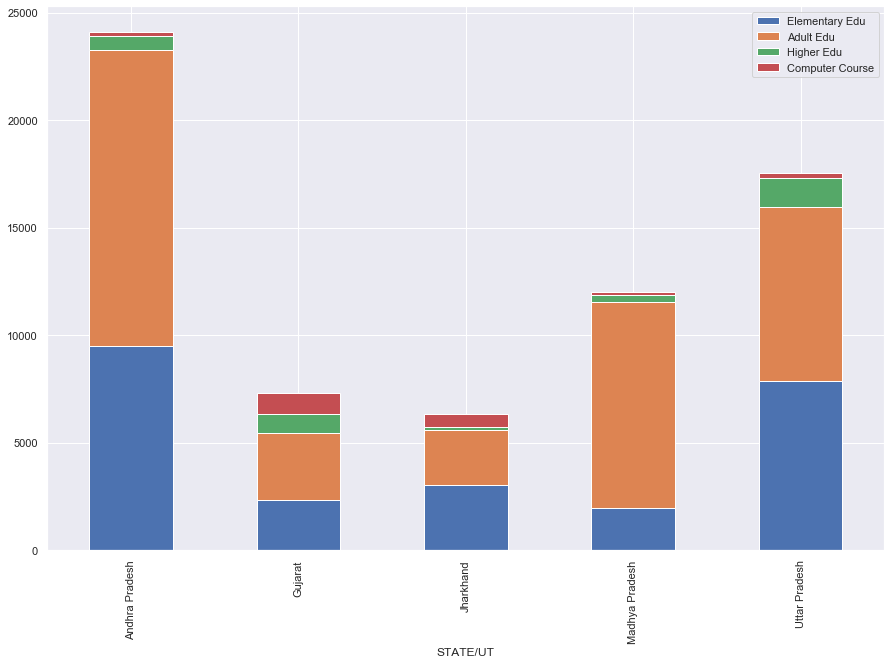

In [116]:
sns.set(rc={'figure.figsize':(15, 7)})
highest_benefitted.plot(kind='bar',figsize=(15,10),stacked=True)

## 100% Bar Stacked Chart

In [119]:
highest_benefitted = highest_benefitted.apply(lambda x: round(100 * x/float(x.sum())))

In [126]:
highest_benefitted = pd.DataFrame(highest_benefitted)

In [139]:
highest_benefitted['Total'] = np.sum(highest_benefitted.iloc[:,0:],axis=1)

In [140]:
highest_benefitted.head()

,Elementary Edu,Adult Edu,Higher Edu,Computer Course,Total
STATE/UT,,,,,
Andhra Pradesh,38.0,37.0,20.0,8.0,103.0
Gujarat,9.0,8.0,26.0,47.0,90.0
Jharkhand,12.0,7.0,4.0,28.0,51.0
Madhya Pradesh,8.0,26.0,9.0,7.0,50.0
Uttar Pradesh,32.0,22.0,41.0,10.0,105.0


In [144]:
new_data = highest_benefitted.apply(lambda x: round(100 * x/highest_benefitted['Total']))

In [145]:
new_data.drop('Total', axis=1, inplace=True)

In [146]:
highest_benefitted

,Elementary Edu,Adult Edu,Higher Edu,Computer Course,Total
STATE/UT,,,,,
Andhra Pradesh,38.0,37.0,20.0,8.0,103.0
Gujarat,9.0,8.0,26.0,47.0,90.0
Jharkhand,12.0,7.0,4.0,28.0,51.0
Madhya Pradesh,8.0,26.0,9.0,7.0,50.0
Uttar Pradesh,32.0,22.0,41.0,10.0,105.0


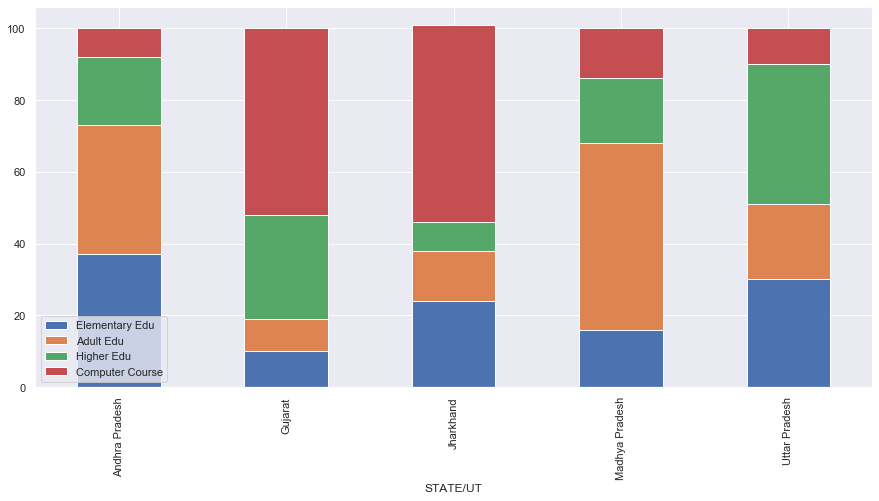

In [147]:
sns.set(rc={'figure.figsize':(15,7)})
new_data.plot(kind='bar', stacked=True)